# Score Derivation 🧮

https://github.com/jeffmur/fhe-video-similarity/wiki/experiment

This notebook serves to analyze, compare, and visualize the difference between SSO and Dart similarity score implementations.

## Baseline: Similarity of Simultaneous Observation (SSO)

In the original paper, they used Kullback-Leibler Divergence (KLD), Cramer's Distance (CD), Correlation Coefficient (CC), Jensen-Shannon Divergence (JSD), and Dynamic Time Warping (DTW)

Due to the limitation of the FHE library, only basic arithmetic operations are supported. Therefore, we can only compare KLD & CD.

## Proposed: Dart Similarity Scores

https://pub.dev/packages/fhe_similarity_score


In [1]:
from utils.baseline_tables import *

## Experiment 1: Average & Standard Deviation

Compare the average and standard deviation of the similarity scores between SSO and Dart.



In [2]:
verbose_kld_cramer('1_baseline')

File | KLD SSO σ | KLD Dart σ | KLD ± σ | KLD JC | Cramer SSO σ | Cramer Dart σ | Cramer ± σ | Cramer JC
---|---|---|---|---|---|---|---|---
720p-90_degree.csv | 1.408425 | 0.881944 | 0.526481 | 0.46| 0.025746 | 0.025746 | 0.000000 | 0.49
720p-180_degree.csv | 0.011143 | 0.011143 | 0.000000 | 0.75| 0.006124 | 0.006124 | 0.000000 | 0.96
1080p-0_degree.csv | 0.006638 | 0.006638 | 0.000000 | 0.72| 0.005275 | 0.005275 | 0.000000 | 0.84
1080p-180_degree.csv | 0.014108 | 0.014108 | 0.000000 | 0.70| 0.004027 | 0.004027 | 0.000000 | 0.96
1080p-90_degree.csv | 0.003487 | 0.003487 | 0.000000 | 0.63| 0.003457 | 0.003457 | 0.000000 | 1.00
720p-0_degree.csv | 0.004465 | 0.004465 | 0.000000 | 0.55| 0.004498 | 0.004498 | 0.000000 | 1.00

The variance in KLD, relates specficially to the absence of data (i.e zero values) for Pcap. KLD has a defined range of [0, ∞] and the SSO implementation uses Shannon [entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) when either P or Q is zero, which has not been performed within the Dart implementation. The dart implementation adds epsilon, 1e-12, to the denominator to avoid division by zero.

In [3]:
summary_kld_cramer('1_baseline')

Algorithm | Dart σ | SSO σ | Avg. Jaccard Coefficient
---|---|---|---
KLD | 0.153631 | 0.241378 | 0.64
Cramer | 0.008188 | 0.008188 | 0.87

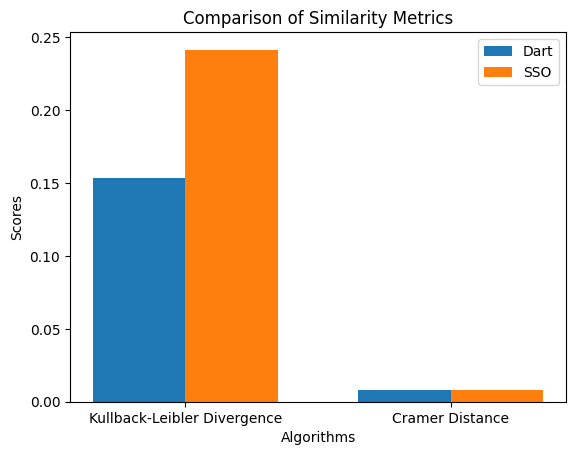

In [4]:
plot_kld_cramer_bar_chart('1_baseline')